# Import all the necessary libraries

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten

# Loading the Dataset

In [62]:
# Train data
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

# Test data
X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

# Shape of the Dataset

In [63]:
# Train data
print(X_train.shape)
print(Y_train.shape)

# Test data
print(X_test.shape)
print(Y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


# Resize the dataset

In [64]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

# Checking the Shape of the Resized Dataset

In [65]:
# Train data
print(X_train.shape)
print(Y_train.shape)

# Test data
print(X_test.shape)
print(Y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


In [66]:
print(X_train)

[[[[ 37.  39.  25.]
   [ 26.  24.   9.]
   [ 34.  25.  10.]
   ...
   [ 57.  44.  35.]
   [ 61.  47.  38.]
   [ 65.  51.  42.]]

  [[ 45.  43.  28.]
   [ 28.  25.   8.]
   [ 52.  40.  24.]
   ...
   [ 54.  41.  32.]
   [ 57.  43.  34.]
   [ 61.  47.  38.]]

  [[ 52.  45.  26.]
   [ 32.  24.   5.]
   [ 69.  54.  35.]
   ...
   [ 54.  40.  29.]
   [ 56.  42.  31.]
   [ 59.  45.  34.]]

  ...

  [[ 20.  39.   0.]
   [101. 125.  67.]
   [152. 182. 120.]
   ...
   [ 46.  41.  19.]
   [ 60.  55.  33.]
   [ 60.  55.  33.]]

  [[ 46.  65.   9.]
   [116. 140.  82.]
   [156. 186. 124.]
   ...
   [ 64.  60.  35.]
   [ 75.  71.  46.]
   [ 72.  68.  43.]]

  [[ 81. 100.  44.]
   [126. 150.  92.]
   [146. 176. 114.]
   ...
   [ 67.  63.  38.]
   [ 78.  74.  49.]
   [ 58.  54.  29.]]]


 [[[131. 128. 135.]
   [160. 157. 164.]
   [198. 192. 204.]
   ...
   [250. 249. 247.]
   [255. 255. 253.]
   [250. 249. 245.]]

  [[140. 137. 144.]
   [127. 124. 131.]
   [120. 114. 124.]
   ...
   [251. 253. 252.]
 

In [67]:
print(X_test)

[[[[118.  82.  96.]
   [109.  71.  82.]
   [116.  77.  78.]
   ...
   [170. 134. 100.]
   [165. 129.  93.]
   [163. 127.  91.]]

  [[ 95.  62.  73.]
   [104.  69.  76.]
   [110.  75.  73.]
   ...
   [174. 138. 102.]
   [170. 134.  98.]
   [167. 132.  94.]]

  [[177. 148. 153.]
   [181. 151. 153.]
   [173. 142. 137.]
   ...
   [175. 141. 103.]
   [171. 137.  99.]
   [168. 135.  94.]]

  ...

  [[ 63.  60.  77.]
   [ 65.  64.  80.]
   [ 65.  67.  82.]
   ...
   [148.  98.  63.]
   [155.  98.  43.]
   [145.  84.  19.]]

  [[ 58.  55.  72.]
   [ 60.  59.  75.]
   [ 60.  62.  77.]
   ...
   [132.  82.  49.]
   [143.  86.  31.]
   [138.  77.  14.]]

  [[ 58.  55.  72.]
   [ 58.  57.  73.]
   [ 55.  57.  72.]
   ...
   [123.  73.  40.]
   [139.  82.  29.]
   [140.  79.  16.]]]


 [[[223. 211. 163.]
   [223. 209. 160.]
   [244. 228. 179.]
   ...
   [252. 253. 255.]
   [254. 255. 255.]
   [245. 246. 250.]]

  [[255. 246. 206.]
   [254. 241. 199.]
   [255. 251. 206.]
   ...
   [252. 252. 250.]
 

# DATA PREPROCESSING

# As we want the pixel size in the range of 0 to 255, we divide the input size of the pixel by 255

In [68]:
X_train = X_train/255.0

X_test  = X_test/255.0

In [69]:
print(X_train)

[[[[0.14509804 0.15294118 0.09803922]
   [0.10196078 0.09411765 0.03529412]
   [0.13333333 0.09803922 0.03921569]
   ...
   [0.22352941 0.17254902 0.1372549 ]
   [0.23921569 0.18431373 0.14901961]
   [0.25490196 0.2        0.16470588]]

  [[0.17647059 0.16862745 0.10980392]
   [0.10980392 0.09803922 0.03137255]
   [0.20392157 0.15686275 0.09411765]
   ...
   [0.21176471 0.16078431 0.1254902 ]
   [0.22352941 0.16862745 0.13333333]
   [0.23921569 0.18431373 0.14901961]]

  [[0.20392157 0.17647059 0.10196078]
   [0.1254902  0.09411765 0.01960784]
   [0.27058824 0.21176471 0.1372549 ]
   ...
   [0.21176471 0.15686275 0.11372549]
   [0.21960784 0.16470588 0.12156863]
   [0.23137255 0.17647059 0.13333333]]

  ...

  [[0.07843137 0.15294118 0.        ]
   [0.39607843 0.49019608 0.2627451 ]
   [0.59607843 0.71372549 0.47058824]
   ...
   [0.18039216 0.16078431 0.0745098 ]
   [0.23529412 0.21568627 0.12941176]
   [0.23529412 0.21568627 0.12941176]]

  [[0.18039216 0.25490196 0.03529412]
   [0.4

In [70]:
print(X_test)

[[[[0.4627451  0.32156863 0.37647059]
   [0.42745098 0.27843137 0.32156863]
   [0.45490196 0.30196078 0.30588235]
   ...
   [0.66666667 0.5254902  0.39215686]
   [0.64705882 0.50588235 0.36470588]
   [0.63921569 0.49803922 0.35686275]]

  [[0.37254902 0.24313725 0.28627451]
   [0.40784314 0.27058824 0.29803922]
   [0.43137255 0.29411765 0.28627451]
   ...
   [0.68235294 0.54117647 0.4       ]
   [0.66666667 0.5254902  0.38431373]
   [0.65490196 0.51764706 0.36862745]]

  [[0.69411765 0.58039216 0.6       ]
   [0.70980392 0.59215686 0.6       ]
   [0.67843137 0.55686275 0.5372549 ]
   ...
   [0.68627451 0.55294118 0.40392157]
   [0.67058824 0.5372549  0.38823529]
   [0.65882353 0.52941176 0.36862745]]

  ...

  [[0.24705882 0.23529412 0.30196078]
   [0.25490196 0.25098039 0.31372549]
   [0.25490196 0.2627451  0.32156863]
   ...
   [0.58039216 0.38431373 0.24705882]
   [0.60784314 0.38431373 0.16862745]
   [0.56862745 0.32941176 0.0745098 ]]

  [[0.22745098 0.21568627 0.28235294]
   [0.2

# DISPLAYING THE IMAGE FOR THE GIVEN INPUT

In [71]:
import random

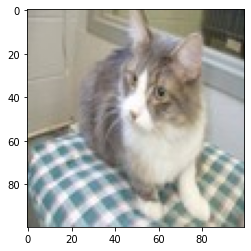

In [72]:
# display the index position of the image
idx = random.randint(0, len(X_train))

# display the input image
plt.imshow(X_train[idx,:])

# BUILDING THE ANN MODEL TO DEPICT THE ACCURACY OF CAT-DOG CLASSIFICATION

In [73]:
# Initializing the ann model

ann = Sequential([
    # depicting the input layer
       Flatten(input_shape = (100, 100, 3)),
    # depicting the first hidden layer
       Dense(3000,  activation = 'relu'),
    # depicting the second hidden layer
       Dense(1000,  activation = 'relu'),
    # depicting the outpiut layer
       Dense(1,     activation = 'sigmoid')
])

# COMPILING THE ANN MODEL

In [74]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# TRAINING THE ANN KODEL

In [75]:
ann.fit(X_train, Y_train, epochs = 10, batch_size = 100)

Epoch 1/10
20/20 [==============================] - 13s 494ms/step - loss: 16.1401 - accuracy: 0.5165
Epoch 2/10
20/20 [==============================] - 11s 545ms/step - loss: 1.5498 - accuracy: 0.5385
Epoch 3/10
20/20 [==============================] - 11s 530ms/step - loss: 0.8056 - accuracy: 0.5475
Epoch 4/10
20/20 [==============================] - 12s 618ms/step - loss: 0.7034 - accuracy: 0.5555
Epoch 5/10
20/20 [==============================] - 12s 592ms/step - loss: 0.6866 - accuracy: 0.5695
Epoch 6/10
20/20 [==============================] - 12s 589ms/step - loss: 0.7001 - accuracy: 0.5590
Epoch 7/10
20/20 [==============================] - 12s 605ms/step - loss: 0.6641 - accuracy: 0.5995
Epoch 8/10
20/20 [==============================] - 10s 508ms/step - loss: 0.6551 - accuracy: 0.6035
Epoch 9/10
20/20 [==============================] - 10s 502ms/step - loss: 0.6851 - accuracy: 0.5960
Epoch 10/10
20/20 [==============================] - 10s 499ms/step - loss: 0.6853 - accur

# SUMMARY OF ANN MODEL

In [76]:
ann.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 30000)             0         
                                                                 
 dense_8 (Dense)             (None, 3000)              90003000  
                                                                 
 dense_9 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_10 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 93,005,001
Trainable params: 93,005,001
Non-trainable params: 0
_________________________________________________________________


# EVAULATE THE ANN MODEL

In [77]:
# To calculate the loss and accuracy of the ann model
loss , accuracy = ann.evaluate(X_test, Y_test, verbose = 0)

print("Loss of the model is:", loss)
print("Accuracy of the model is:", (accuracy * 100.0))

Loss of the model is: 0.7271428108215332
Accuracy of the model is: 51.99999809265137


# By training the cat-dog image using ANN Model, we got its accuracy (61.00)

# BUILDING THE CNN MODEL TO PREDICT THE ACCURACY OF CAT-DOG CALSSIFICATION

In [78]:
from keras.layers import Dropout

In [79]:
# building the cnnmodel
cnn = Sequential([
    # building the first convoluted layer
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (100,100,3)),
    # performing the max pooling on it
    MaxPooling2D((2,2)),
    
    # building the second convoluted layer
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    #performing the max pooling on it
    MaxPooling2D((2,2)),
    
    # Performing the dropout on the convoluted layer to reduce the number of neurons in that layer
    Dropout(0.5),
    
    # Performing the Flattening operation on the Max Pooled Layer to make it in one row
    Flatten(),
    
    
    # Adding the first dense layer to the ANN Model
    Dense(64, activation = 'relu'),
    
    # Adding the output layer to the ANN Model
    Dense(1, activation = 'sigmoid')
])

# COMPILE THE CNN MODEL

In [80]:
cnn.compile(optimizer = 'adam',loss = 'binary_crossentropy' ,metrics = ['accuracy'])

# TRAIN THE CNN MODEL

In [81]:
cnn.fit(X_train, Y_train, epochs = 10, batch_size = 140, verbose = 2, validation_split = 0.1)

Epoch 1/10
13/13 - 9s - loss: 0.6965 - accuracy: 0.5250 - val_loss: 0.8653 - val_accuracy: 0.0000e+00 - 9s/epoch - 727ms/step
Epoch 2/10
13/13 - 9s - loss: 0.6734 - accuracy: 0.5572 - val_loss: 0.7232 - val_accuracy: 0.3050 - 9s/epoch - 666ms/step
Epoch 3/10
13/13 - 9s - loss: 0.6517 - accuracy: 0.6178 - val_loss: 0.9368 - val_accuracy: 0.0700 - 9s/epoch - 668ms/step
Epoch 4/10
13/13 - 9s - loss: 0.6284 - accuracy: 0.6461 - val_loss: 0.8482 - val_accuracy: 0.3400 - 9s/epoch - 685ms/step
Epoch 5/10
13/13 - 9s - loss: 0.5781 - accuracy: 0.6950 - val_loss: 0.5767 - val_accuracy: 0.7750 - 9s/epoch - 716ms/step
Epoch 6/10
13/13 - 10s - loss: 0.5781 - accuracy: 0.6806 - val_loss: 0.5808 - val_accuracy: 0.7600 - 10s/epoch - 754ms/step
Epoch 7/10
13/13 - 9s - loss: 0.5406 - accuracy: 0.7450 - val_loss: 1.0055 - val_accuracy: 0.2150 - 9s/epoch - 698ms/step
Epoch 8/10
13/13 - 9s - loss: 0.4972 - accuracy: 0.7617 - val_loss: 0.7864 - val_accuracy: 0.5400 - 9s/epoch - 709ms/step
Epoch 9/10
13/13 -

# SUMMARY OF CNN MODEL

In [82]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 16928)            

# COMPUTE THE ACCURACY AND LOSS OF CNN MODEL

In [83]:
loss, accuracy = cnn.evaluate(X_test, Y_test)
print("Loss of the model is:", loss)
print("Accuracy of the model is:", (accuracy * 100.0))

13/13 [==============================] - 0s 32ms/step - loss: 0.5881 - accuracy: 0.6700
Loss of the model is: 0.5881406664848328
Accuracy of the model is: 67.00000166893005


# Observation:

# Now by training the cat-dog image using CNN Model, we got its accuracy of 66.5 which has improved from the ANN Model of 61

# MAKE THE PREDICTIONS USING TEST DATASET

AxesImage(54,36;334.8x217.44)


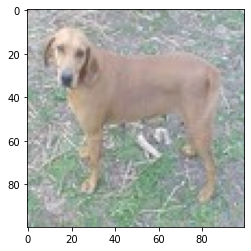

[[False]]
Our model says it is a : cat


In [84]:
import random
idx = random.randint(0, len(X_test))

print(plt.imshow(X_test[idx,:]))

plt.show()

# Predicted output
pred_y = cnn.predict(X_test[idx, :].reshape(1, 100,100,3))
pred_y = pred_y > 0.5
print(pred_y)

# To predict whether the image is a cat or a dog
if(pred_y > 0.5):
    pred_y = 'dog'
else:
    pred_y = 'cat'
print('Our model says it is a :', pred_y)